In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image
from zipfile import ZipFile 

In [2]:
# importing libraries for Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
test_dir="D:/programming/kaggle/cats_vs_dogs/dataset/test_set"
train_dir="D:/programming/kaggle/cats_vs_dogs/dataset/training_set"

train_dir_cats = train_dir + '/cats'
train_dir_dogs = train_dir + '/dogs'
test_dir_cats = test_dir + '/cats'
test_dir_dogs = test_dir + '/dogs'

In [10]:
print('number of cats training images - ',len(os.listdir(train_dir_cats)))
print('number of dogs training images - ',len(os.listdir(train_dir_dogs)))
print('number of cats testing images - ',len(os.listdir(test_dir_cats)))
print('number of dogs testing images - ',len(os.listdir(test_dir_dogs)))

number of cats training images -  4000
number of dogs training images -  4000
number of cats testing images -  1000
number of dogs testing images -  1000


In [11]:
data_generator = ImageDataGenerator(rescale = 1.0/255.0, zoom_range = 0.2)

In [25]:
batch_size = 16
training_data = data_generator.flow_from_directory(directory = train_dir,
                                                   target_size = (64, 64),
                                                   batch_size = batch_size,
                                                   class_mode = 'binary')
testing_data = data_generator.flow_from_directory(directory = test_dir,
                                                  target_size = (64, 64),
                                                  batch_size = batch_size,
                                                  class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [26]:
# preparing the layers in the Convolutional Deep Neural Network
model = Sequential()
model.add(Conv2D(32, 3, activation = 'relu', input_shape = training_data.image_shape))
model.add(MaxPooling2D(2))
model.add(Dropout(rate = 0.2))
model.add(Conv2D(64, 3, activation = 'relu'))
model.add(MaxPooling2D(2))
model.add(Dropout(rate = 0.2))
model.add(Conv2D(64, 3, activation = 'relu'))
model.add(MaxPooling2D(2))
model.add(Dropout(rate = 0.2))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(units = len(set(training_data.classes)), activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 64)        36928     
__________

In [27]:
fitted_model = model.fit_generator(training_data,
                        steps_per_epoch = 2000,
                        epochs = 20,
                        validation_data = testing_data,
                        validation_steps = 1000)

Epoch 1/20
500/500 [==============================] - 179s 358ms/step - loss: 0.6897 - acc: 0.5389 - val_loss: 0.6850 - val_acc: 0.5485
Epoch 2/20
500/500 [==============================] - 184s 368ms/step - loss: 0.6700 - acc: 0.5838 - val_loss: 0.6439 - val_acc: 0.6500
Epoch 3/20
500/500 [==============================] - 179s 357ms/step - loss: 0.6247 - acc: 0.6488 - val_loss: 0.5924 - val_acc: 0.6955
Epoch 4/20
500/500 [==============================] - 181s 362ms/step - loss: 0.5985 - acc: 0.6790 - val_loss: 0.5904 - val_acc: 0.6785
Epoch 5/20
500/500 [==============================] - 177s 353ms/step - loss: 0.5773 - acc: 0.6965 - val_loss: 0.5530 - val_acc: 0.7230
Epoch 6/20
500/500 [==============================] - 176s 353ms/step - loss: 0.5609 - acc: 0.7139 - val_loss: 0.5822 - val_acc: 0.6890
Epoch 7/20
500/500 [==============================] - 179s 359ms/step - loss: 0.5482 - acc: 0.7209 - val_loss: 0.5396 - val_acc: 0.7340
Epoch 8/20
500/500 [============================

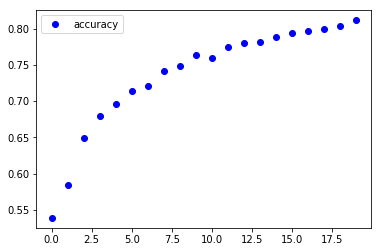

In [28]:
# plotting accuracy and validation accuracy
accuracy = fitted_model.history['acc']
plt.plot(range(len(accuracy)), accuracy, 'bo', label = 'accuracy')
plt.legend()

In [29]:
# testing the model
def testing_image(image_directory):
    test_image = image.load_img(image_directory, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(x = test_image)
    print(result)
    if result[0][0]  == 1:
        prediction = 'Dog'
    else:
        prediction = 'Cat'
    return prediction

In [30]:
print(testing_image(test_dir + '/cats/cat.4003.jpg'))

[[0. 1.]]
Cat
